## Keras Regression Code Along Project

## The Data
We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

Feature Columns
id - Unique ID for each home sold
date - Date of the home sale
price - Price of each home sold
bedrooms - Number of bedrooms
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
sqft_living - Square footage of the apartments interior living space
sqft_lot - Square footage of the land space
floors - Number of floors
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above - The square footage of the interior housing space that is above ground level
sqft_basement - The square footage of the interior housing space that is below ground level
yr_built - The year the house was initially built
yr_renovated - The year of the house’s last renovation
zipcode - What zipcode area the house is in
lat - Lattitude
long - Longitude
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exploratory Data Analysis

In [3]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


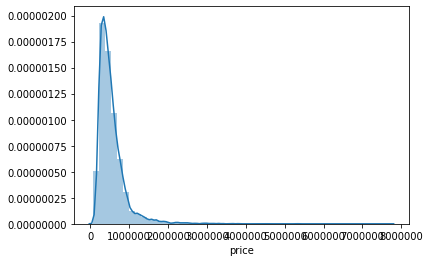

In [5]:
#plt.figure(figsize=(8,5))
sns.distplot(data['price'])

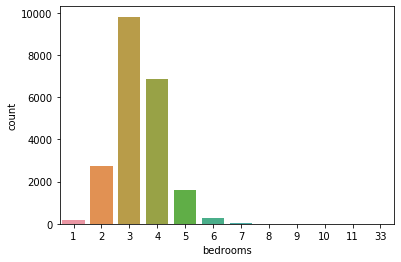

In [6]:
sns.countplot(data['bedrooms'])

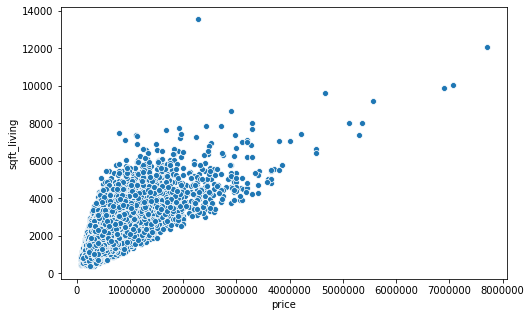

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='price', y='sqft_living', data=data)

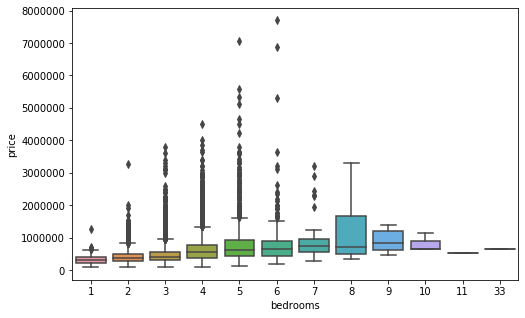

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x='bedrooms', y='price', data=data)

### Geographical Properties

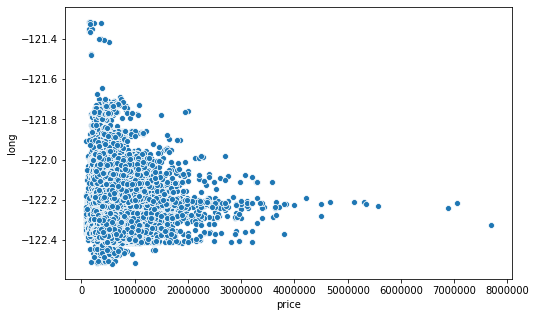

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='price', y='long', data=data)

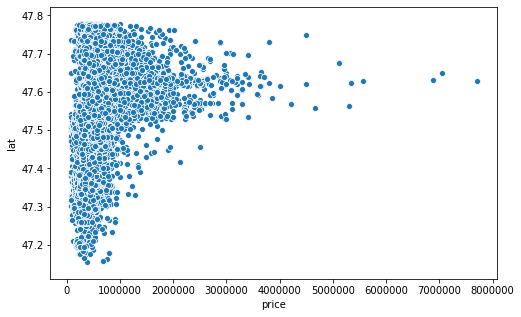

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='price', y='lat', data=data)

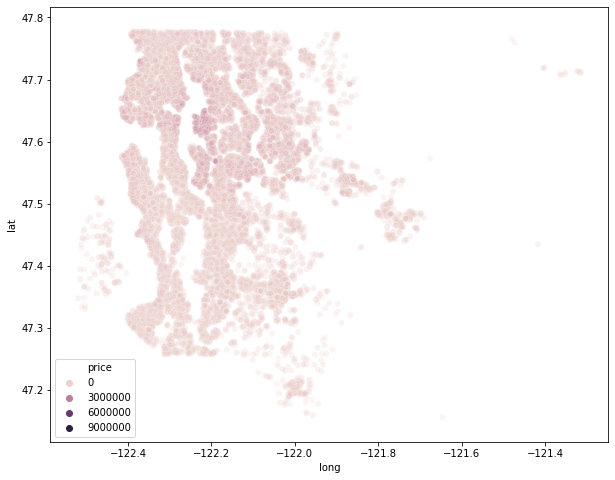

In [11]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long', y='lat', data=data, alpha=0.2,hue='price')

In [12]:
data.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [13]:
len(data) * 0.01

215.97

In [14]:
non_top_1_perc = data.sort_values('price', ascending=False).iloc[216:]

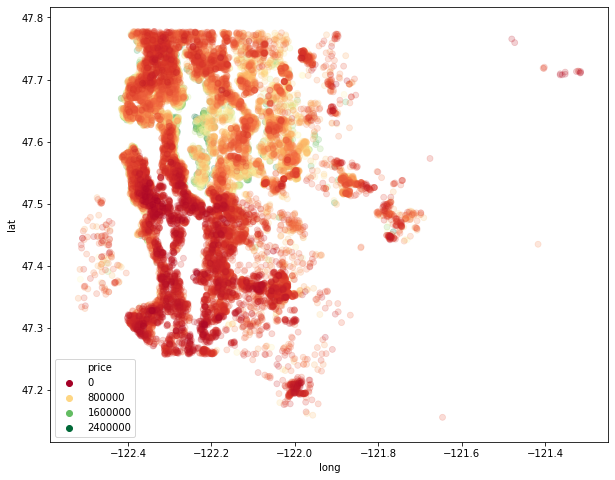

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, alpha=0.2,hue='price', palette='RdYlGn',edgecolor=None)

## Other Features

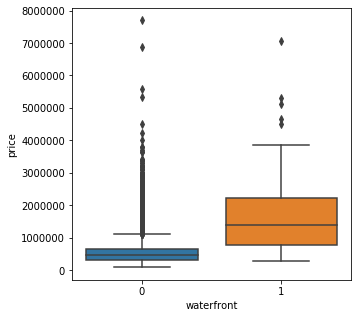

In [16]:
plt.figure(figsize=(5,5))
sns.boxplot(x='waterfront', y='price', data=data)

### Working with Feature Data

In [17]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [19]:
data = data.drop('id', axis=1)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering from Date

In [20]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].apply(lambda date : date.month)
data['year'] = data['date'].apply(lambda date : date.year)

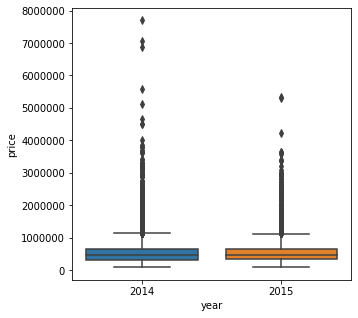

In [21]:
plt.figure(figsize=(5,5))
sns.boxplot(x='year', y='price', data=data)

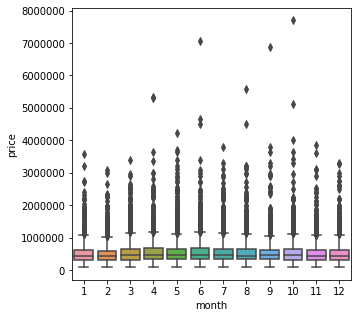

In [22]:
plt.figure(figsize=(5,5))
sns.boxplot(x='month', y='price', data=data)

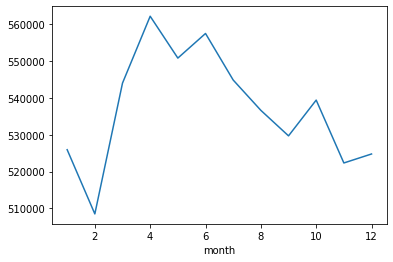

In [23]:
data.groupby('month').mean()['price'].plot()

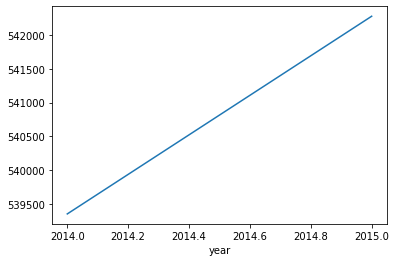

In [24]:
data.groupby('year').mean()['price'].plot()

In [25]:
data = data.drop('date', axis=1)

In [26]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [27]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
data['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [28]:
data = data.drop('zipcode',axis=1)

In [29]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [30]:
# could make sense due to scaling, higher should correlate to more value
data['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [31]:
data['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

### Scaling and Train Test Split

In [32]:
X = data.drop('price',axis=1)
y = data['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train.shape

(15117, 19)

In [35]:
X_test.shape

(6480, 19)

### Creating a Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(units=19, activation='relu'))
model.add(Dense(units=19, activation='relu'))
model.add(Dense(units=19, activation='relu'))
model.add(Dense(units=19, activation='relu'))

model.add(Dense(units=1))


model.compile(optimizer='adam', loss='mse')

### Training the Model

In [37]:
model.fit(x = X_train,
          y = y_train.values,
          validation_data=(X_test, y_test.values),
          batch_size=128,
          epochs=400
          )

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 81us/sample - loss: 430239138939.7579 - val_loss: 418910233000.7704
Epoch 2/400
15117/15117 [==============================] - 0s 24us/sample - loss: 429089187881.0494 - val_loss: 414897835495.9802
Epoch 3/400
15117/15117 [==============================] - 0s 25us/sample - loss: 413072003112.9139 - val_loss: 377881311540.4642
Epoch 4/400
15117/15117 [==============================] - 0s 25us/sample - loss: 334062675065.0484 - val_loss: 251151882042.7852
Epoch 5/400
15117/15117 [==============================] - 0s 25us/sample - loss: 181152836683.9346 - val_loss: 113353397791.6049
Epoch 6/400
15117/15117 [==============================] - 0s 25us/sample - loss: 103166394746.6571 - val_loss: 94853635499.2988
Epoch 7/400
15117/15117 [==============================] - 0s 26us/sample - loss: 97351026409.0536 - val_loss: 93281880008.3753
Epoch 8/400
15117/15117 [===================

15117/15117 [==============================] - 0s 29us/sample - loss: 37762553271.7571 - val_loss: 36417598759.8222
Epoch 65/400
15117/15117 [==============================] - 0s 29us/sample - loss: 37582117552.0857 - val_loss: 36191910631.3481
Epoch 66/400
15117/15117 [==============================] - 0s 29us/sample - loss: 37375850377.4580 - val_loss: 36040494901.7284
Epoch 67/400
15117/15117 [==============================] - 0s 29us/sample - loss: 37260483032.9489 - val_loss: 35824708281.8370
Epoch 68/400
15117/15117 [==============================] - 0s 29us/sample - loss: 37055800204.7771 - val_loss: 35665260043.3778
Epoch 69/400
15117/15117 [==============================] - 0s 29us/sample - loss: 36887727819.8923 - val_loss: 35503169161.7975
Epoch 70/400
15117/15117 [==============================] - 0s 30us/sample - loss: 36721526559.1088 - val_loss: 35459324445.0765
Epoch 71/400
15117/15117 [==============================] - 0s 30us/sample - loss: 36590323918.3309 - val_loss

15117/15117 [==============================] - 0s 31us/sample - loss: 32786709477.9208 - val_loss: 31368238042.0741
Epoch 128/400
15117/15117 [==============================] - 0s 31us/sample - loss: 32796758652.1982 - val_loss: 31272604962.7654
Epoch 129/400
15117/15117 [==============================] - 0s 31us/sample - loss: 32772592823.0966 - val_loss: 31212273117.8667
Epoch 130/400
15117/15117 [==============================] - 0s 30us/sample - loss: 32739655995.7960 - val_loss: 31190505461.8864
Epoch 131/400
15117/15117 [==============================] - 0s 31us/sample - loss: 32662055715.7828 - val_loss: 31132130589.7086
Epoch 132/400
15117/15117 [==============================] - 0s 31us/sample - loss: 32623211401.2547 - val_loss: 31140847262.0247
Epoch 133/400
15117/15117 [==============================] - 0s 32us/sample - loss: 32609499609.0166 - val_loss: 31139587479.0716
Epoch 134/400
15117/15117 [==============================] - 0s 32us/sample - loss: 32593592612.9004 - v

15117/15117 [==============================] - 0s 33us/sample - loss: 31377190135.7190 - val_loss: 29547165493.7284
Epoch 191/400
15117/15117 [==============================] - 0s 33us/sample - loss: 31365970650.6254 - val_loss: 29609651961.0469
Epoch 192/400
15117/15117 [==============================] - 0s 32us/sample - loss: 31294640121.4971 - val_loss: 29541588668.3654
Epoch 193/400
15117/15117 [==============================] - 0s 32us/sample - loss: 31296186895.3089 - val_loss: 29510828143.2494
Epoch 194/400
15117/15117 [==============================] - 1s 33us/sample - loss: 31332185611.9558 - val_loss: 29496060682.7457
Epoch 195/400
15117/15117 [==============================] - 0s 33us/sample - loss: 31306922430.3954 - val_loss: 29468690846.6568
Epoch 196/400
15117/15117 [==============================] - 0s 33us/sample - loss: 31300205697.8543 - val_loss: 29498058736.8296
Epoch 197/400
15117/15117 [==============================] - 0s 33us/sample - loss: 31245808550.1113 - v

15117/15117 [==============================] - 1s 42us/sample - loss: 30568753306.1724 - val_loss: 28610914086.5580
Epoch 254/400
15117/15117 [==============================] - 1s 43us/sample - loss: 30554614674.8736 - val_loss: 28658244104.8494
Epoch 255/400
15117/15117 [==============================] - 1s 45us/sample - loss: 30551351312.5281 - val_loss: 28723422741.4914
Epoch 256/400
15117/15117 [==============================] - 1s 46us/sample - loss: 30588809861.5122 - val_loss: 28588320105.5605
Epoch 257/400
15117/15117 [==============================] - 1s 47us/sample - loss: 30548135529.7056 - val_loss: 28805569391.8815
Epoch 258/400
15117/15117 [==============================] - 1s 45us/sample - loss: 30502697438.6389 - val_loss: 28541342140.9975
Epoch 259/400
15117/15117 [==============================] - 1s 45us/sample - loss: 30487136490.2391 - val_loss: 28523829232.8296
Epoch 260/400
15117/15117 [==============================] - 1s 45us/sample - loss: 30496009141.4879 - v

15117/15117 [==============================] - 1s 43us/sample - loss: 29900866062.7331 - val_loss: 28251093497.6790
Epoch 317/400
15117/15117 [==============================] - 1s 43us/sample - loss: 29983884663.0670 - val_loss: 27793330732.2469
Epoch 318/400
15117/15117 [==============================] - 1s 42us/sample - loss: 29887699600.5197 - val_loss: 27740035329.8963
Epoch 319/400
15117/15117 [==============================] - 1s 43us/sample - loss: 29920989141.1894 - val_loss: 27713458246.7951
Epoch 320/400
15117/15117 [==============================] - 1s 43us/sample - loss: 29915881675.7568 - val_loss: 27742406974.5778
Epoch 321/400
15117/15117 [==============================] - 1s 43us/sample - loss: 29879200112.7673 - val_loss: 27702342840.5728
Epoch 322/400
15117/15117 [==============================] - 1s 43us/sample - loss: 29868178653.7075 - val_loss: 27702805329.5407
Epoch 323/400
15117/15117 [==============================] - 1s 44us/sample - loss: 29850431954.7677 - v

15117/15117 [==============================] - 1s 45us/sample - loss: 29350284398.6167 - val_loss: 26910657396.9383
Epoch 380/400
15117/15117 [==============================] - 1s 45us/sample - loss: 29383687695.6475 - val_loss: 26925320485.2938
Epoch 381/400
15117/15117 [==============================] - 1s 43us/sample - loss: 29304593109.7482 - val_loss: 26966132918.0444
Epoch 382/400
15117/15117 [==============================] - 1s 43us/sample - loss: 29298539198.9882 - val_loss: 26919911029.5704
Epoch 383/400
15117/15117 [==============================] - 1s 43us/sample - loss: 29349365285.4254 - val_loss: 26944542583.4667
Epoch 384/400
15117/15117 [==============================] - 1s 43us/sample - loss: 29285529611.5155 - val_loss: 26901180087.3086
Epoch 385/400
15117/15117 [==============================] - 1s 42us/sample - loss: 29371251738.3163 - val_loss: 26945180962.7654
Epoch 386/400
15117/15117 [==============================] - 1s 43us/sample - loss: 29256944912.7822 - v

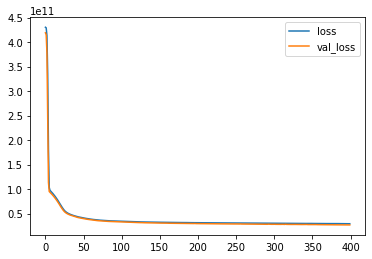

In [38]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### Evaluation on Test Data

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [40]:
predictions = model.predict(X_test)

In [41]:
mean_absolute_error(y_test,predictions)

100733.54472415123

In [42]:
mean_squared_error(y_test,predictions)

26704688895.57372

In [43]:
#RMSE
np.sqrt(mean_squared_error(y_test,predictions))

163415.6935412683

In [44]:
explained_variance_score(y_test,predictions)

0.7986320992453968

In [45]:
data['price'].mean()

540296.5735055795

In [46]:
data['price'].median()

450000.0

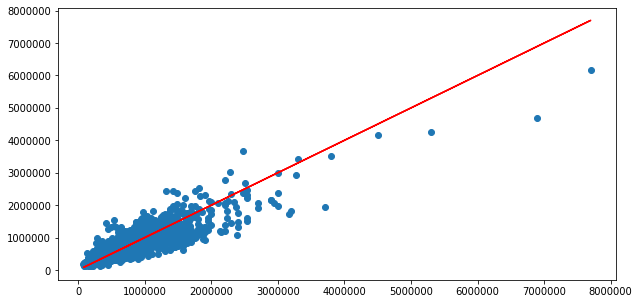

In [47]:
# Our predictions
plt.figure(figsize=(10,5))
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [48]:
errors = y_test.values.reshape(6480, 1) - predictions

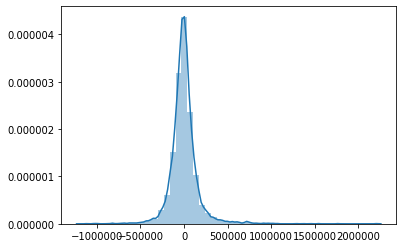

In [49]:
sns.distplot(errors)

### Predicting on a brand new house

In [65]:
single_house = data.drop('price', axis=1).iloc[0]

single_house = scaler.transform(single_house.values.reshape(-1,19))
model.predict(single_house)

array([[277901.38]], dtype=float32)

In [56]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [52]:
data.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64